In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('autism_screening.csv')
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

In [3]:
df.shape


(704, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [7]:
df['ethnicity'].value_counts()


ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: count, dtype: int64

In [8]:
df['relation'].value_counts()


relation
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [9]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})
print (df)


     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice  \


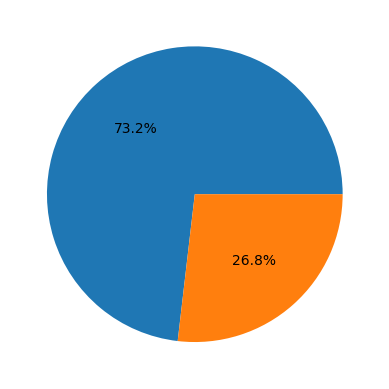

In [10]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [11]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
	  ints.append(col)
  elif df[col].dtype == object:
	  objects.append(col)
  else:
  	floats.append(col)

In [12]:
if 'ID' in ints:
    ints.remove('ID')
if 'Class/ASD' in ints:
    ints.remove('Class/ASD')


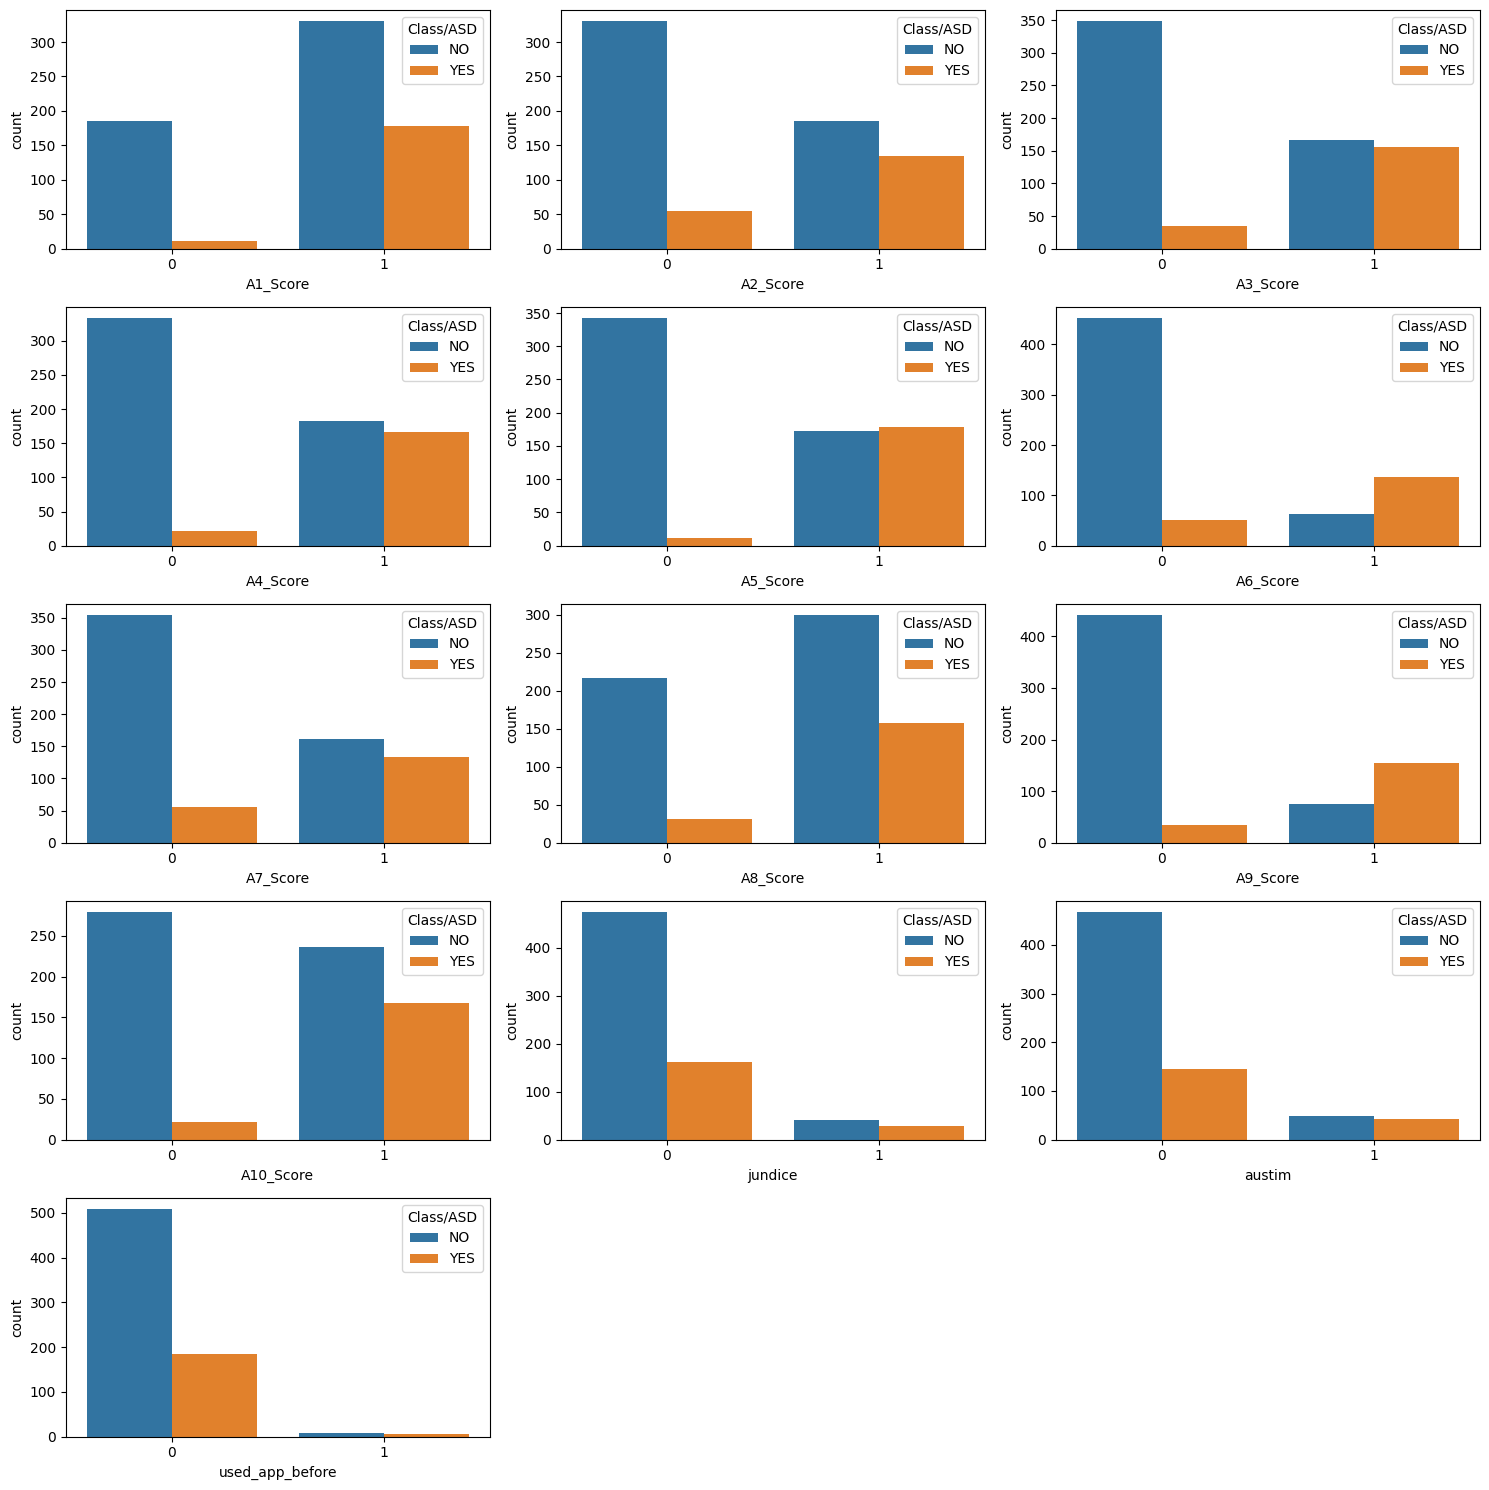

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))


num_cols = len(ints)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

for i, col in enumerate(ints):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(data=df, x=col, hue='Class/ASD')
    plt.tight_layout()

plt.show()


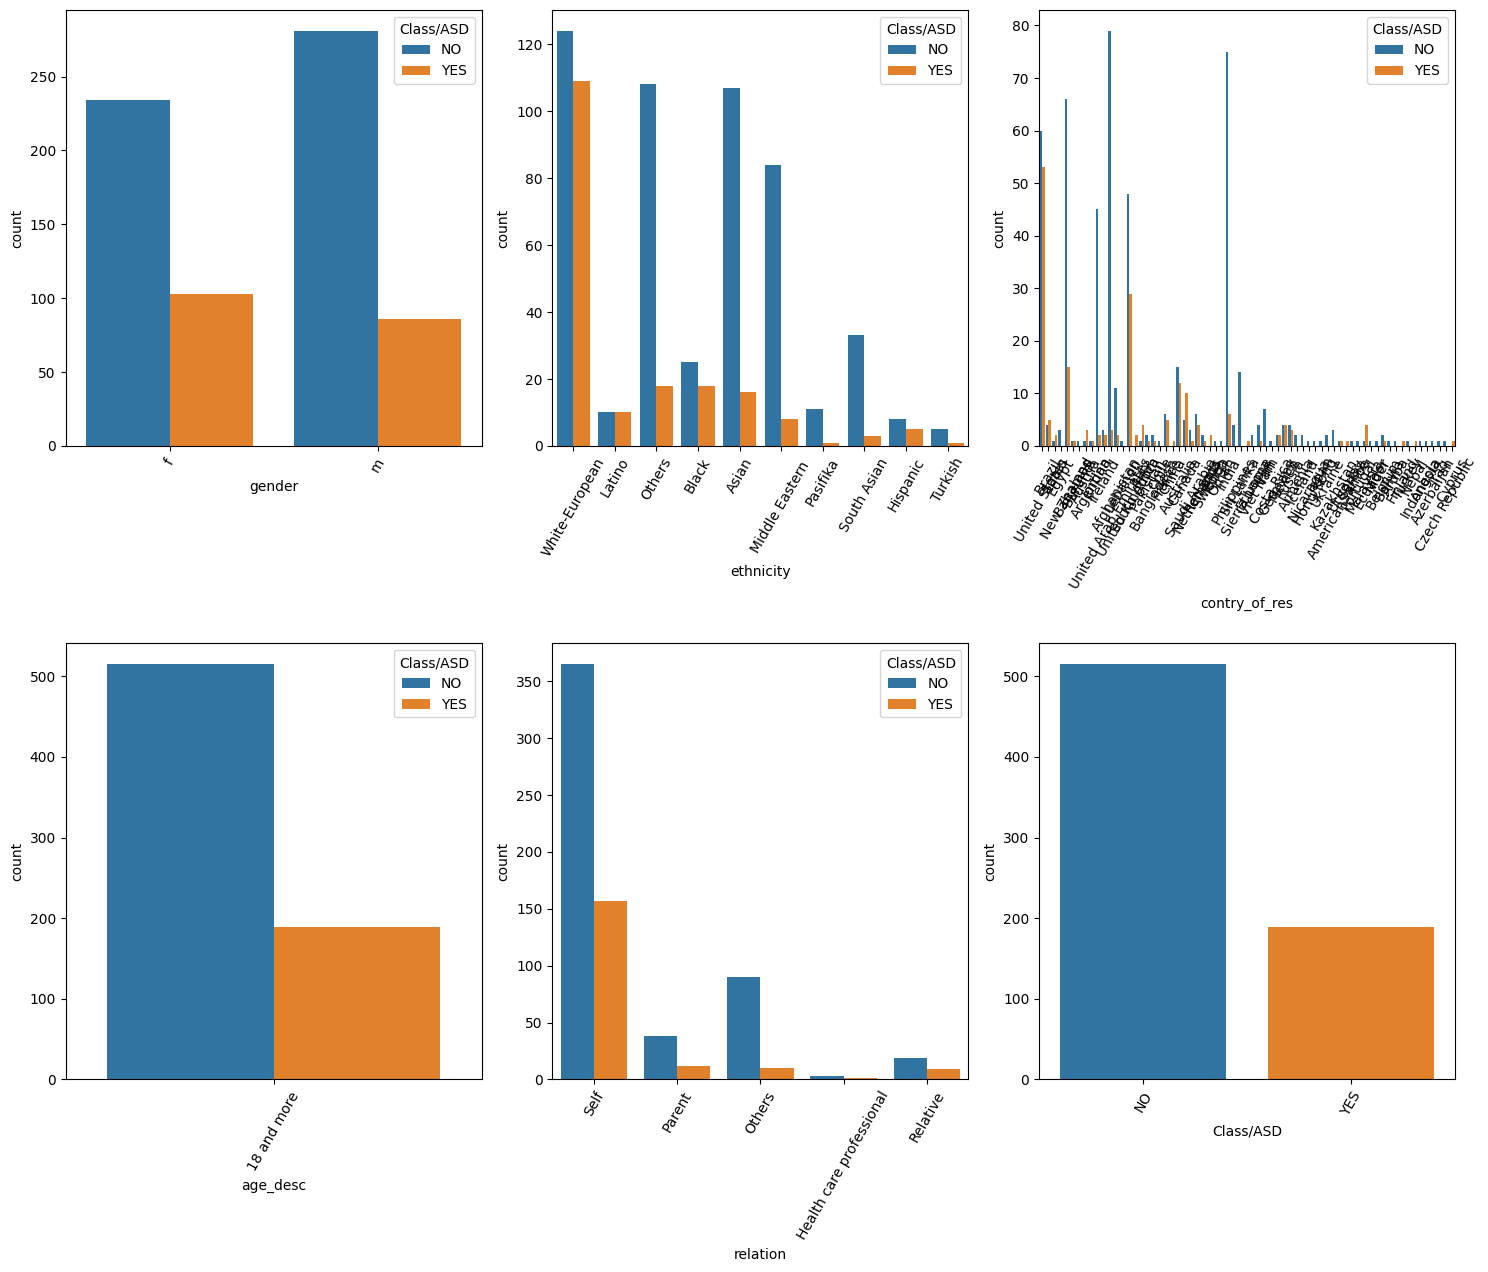

In [14]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    sns.countplot(data=df, x=col, hue='Class/ASD')
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


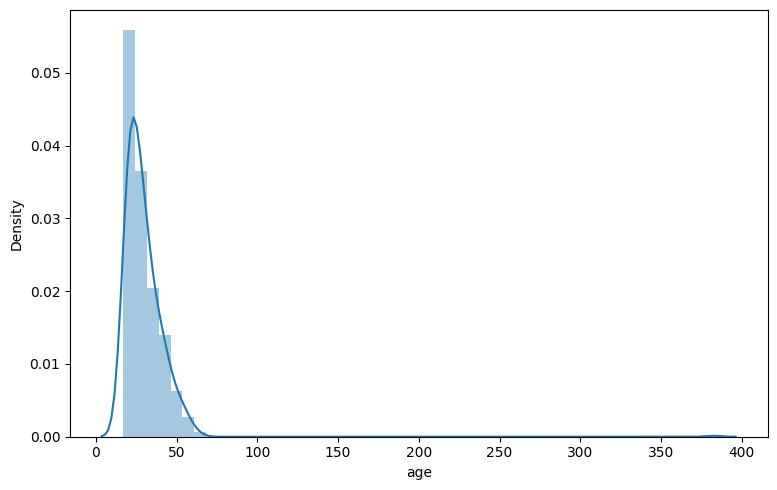

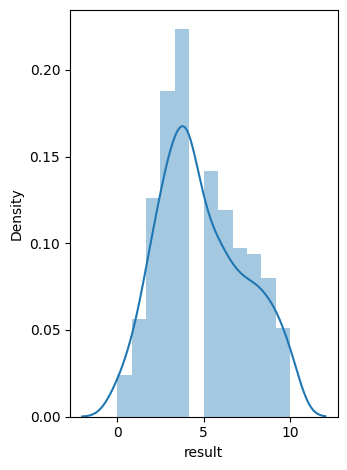

In [15]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
  plt.tight_layout()
  plt.show()


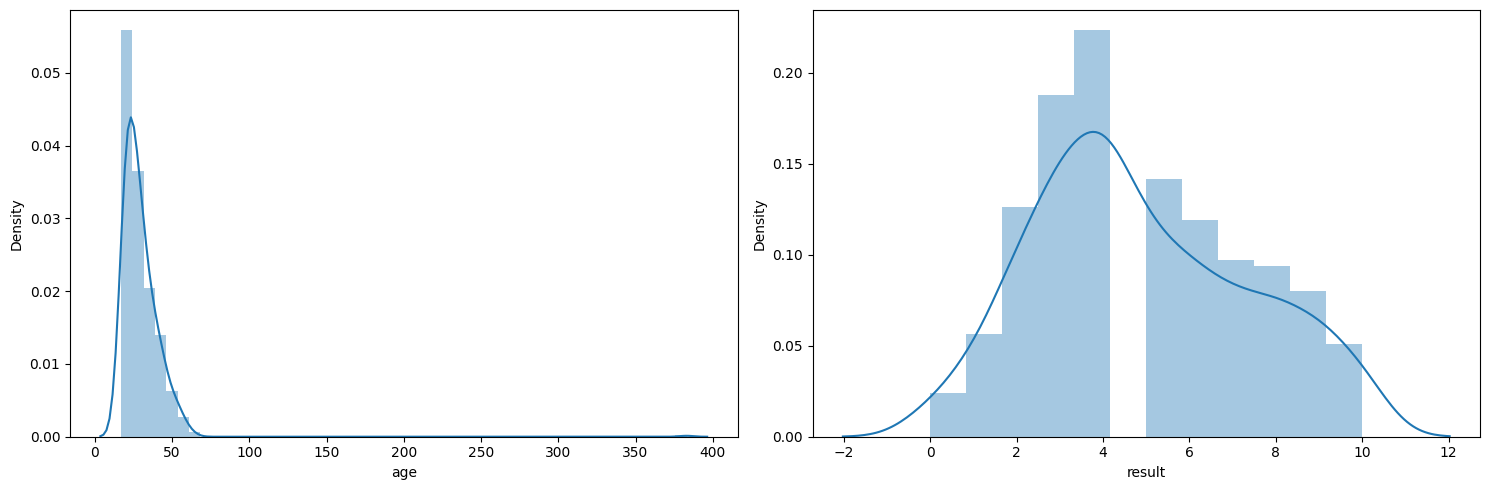

In [16]:
plt.subplots(figsize=(15, 5))

for i, col in enumerate(floats):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
    plt.tight_layout()

plt.show()


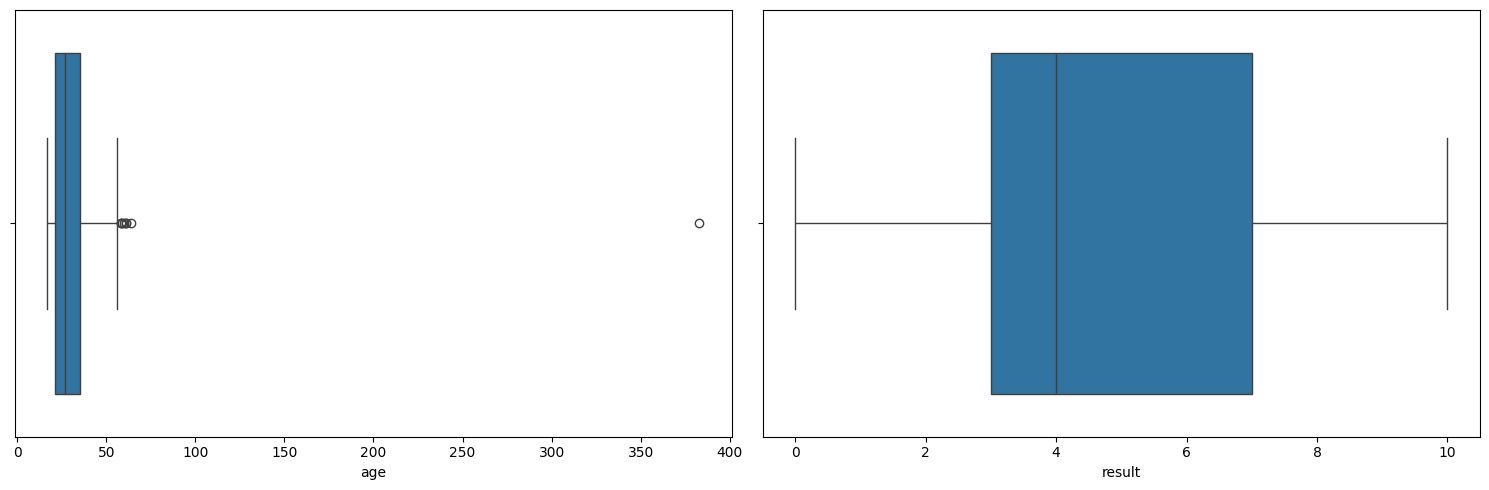

In [17]:
plt.subplots(figsize=(15, 5))

for i, col in enumerate(floats):
    plt.subplot(1, 2, i+1)
    sb.boxplot(data=df, x=col)
    plt.tight_layout()

plt.show()



In [18]:
df = df[df['result']>-5]
df.shape


(704, 21)

In [21]:
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


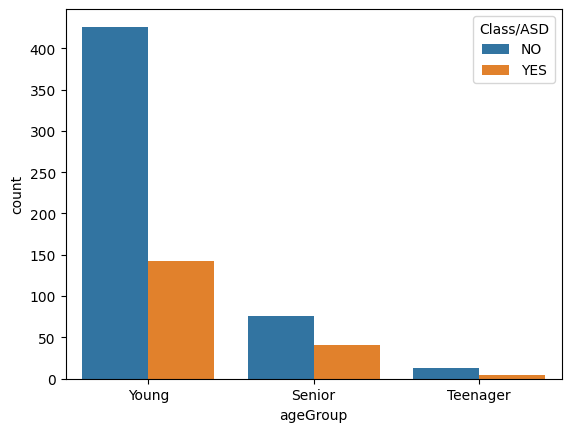

In [20]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [22]:
def add_feature(data):
    data['sum_score'] = 0
    for col in data.loc[:, 'A1_Score':'A10_Score'].columns:
        data['sum_score'] += data[col]


    data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']

    return data

df = add_feature(df)




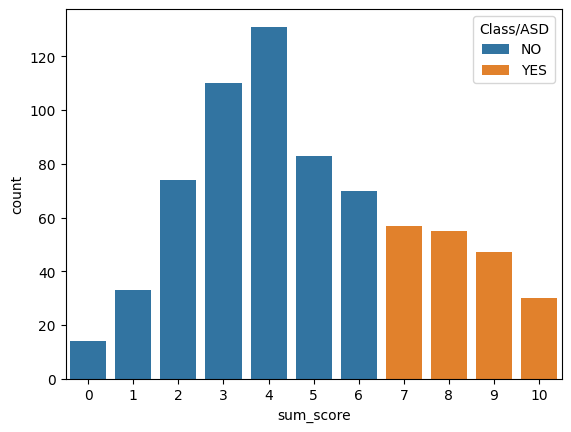

In [23]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [24]:
df['age'] = df['age'].apply(lambda x: np.log(x))


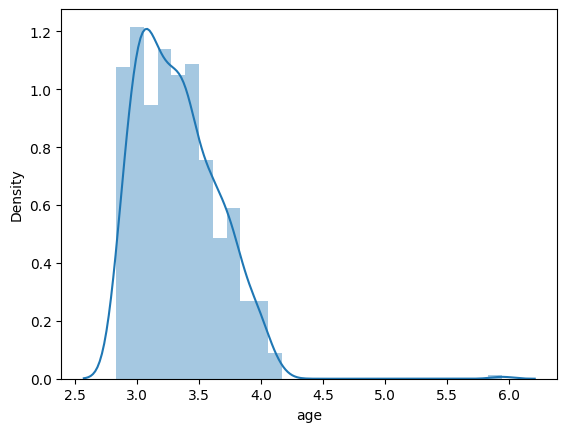

In [25]:
sb.distplot(df['age'])
plt.show()


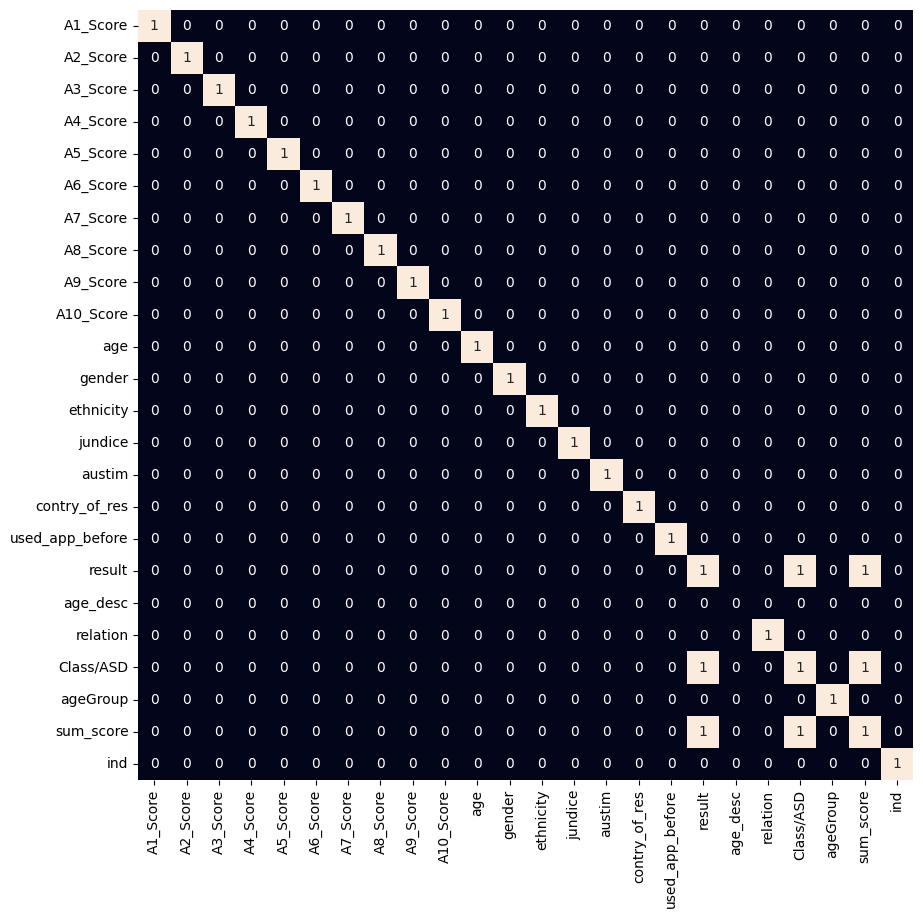

In [26]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [27]:
removal = [ 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)


ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape


((820, 20), (820,))

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')


X_imputed = imputer.fit_transform(X)



In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X_imputed, Y)

    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X_imputed)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
    print()


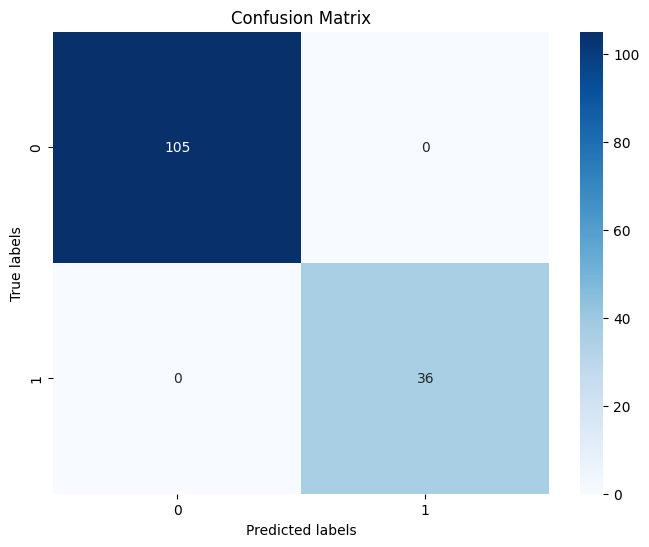

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = models[0].predict(X_val)


cm = confusion_matrix(Y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
